### 0.0 Importing Libs & Data

In [1]:
#Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('Leads.csv')

### 0.1 Checking the dataframe

In [4]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Null Percentage

round(data.isnull().sum()/data.isnull().count()*100,3).sort_values(ascending=False)

Lead Quality                                     51.591
Asymmetrique Profile Index                       45.649
Asymmetrique Activity Score                      45.649
Asymmetrique Activity Index                      45.649
Asymmetrique Profile Score                       45.649
Tags                                             36.288
What matters most to you in choosing a course    29.318
Lead Profile                                     29.318
What is your current occupation                  29.113
Country                                          26.634
How did you hear about X Education               23.885
Specialization                                   15.563
City                                             15.368
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
Do Not Email                                    

# 1. DATA CLEANING

### 1.1 Replacing the Select with NaN

In [8]:
data = data.replace('Select', np.nan)

In [9]:
round(data.isnull().sum()/data.isnull().count()*100,3).sort_values(ascending=False)

How did you hear about X Education               78.463
Lead Profile                                     74.188
Lead Quality                                     51.591
Asymmetrique Profile Index                       45.649
Asymmetrique Activity Index                      45.649
Asymmetrique Activity Score                      45.649
Asymmetrique Profile Score                       45.649
City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
Do Not Email                                    

### 1.2 Dropping columns with more than 40% of MISSING VALUES

In [10]:
nulls = data.isnull().sum()/data.isnull().count()*100

col_drop = nulls[nulls >40].index.to_list()
col_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
data.drop(col_drop,axis=1,inplace=True)

### 1.3 Missing value check on other columns for replacement

In [12]:
nulls =round(data.isnull().sum()/data.isnull().count()*100,3).sort_values(ascending=False)
nulls

City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
Prospect ID                                       0.000
Do Not Call                                       0.000
Lead Origin                                       0.000
Lead Number                                       0.000
Converted                                         0.000
Total Time Spent on Website                       0.000
Do Not Email                                      0.000
Search                                          

In [13]:
# checking the value counts for all columns

col_null = nulls[nulls >0].index.to_list()
for col in col_null:
    print(data[col].value_counts())
    print('')

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40

#### 1.3.1 Replacing Nulls with mode for :
'Page Views Per Visit'  
'TotalVisits' 

In [14]:
numerical =['Page Views Per Visit' ,'TotalVisits' ]
data[numerical].mode()

Page Views Per Visit  TotalVisits
0                   0.0          0.0

In [15]:
data[numerical] = data[numerical].fillna(0.0)

#### 1.3.2 Imputing NaN with others :
Specialization  
Tags  
What is your current occupation    
Last Activity    
Lead Source

In [16]:
others = ['Specialization','Tags','What is your current occupation','Last Activity','Lead Source']
data[others] = data[others].replace(np.nan, 'Others')

#### 1.3.3 Category Reduction


In [17]:
col_null = nulls[nulls >0].index.to_list()
for col in col_null:
    print(data[col].value_counts())
    print('')

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business             

In [18]:
# Moving < 100 category to other

reduceColumns =['Specialization','Tags','What is your current occupation','Last Activity','Lead Source','Last Notable Activity']

for i in reduceColumns:
    subdata = data[i].value_counts()
    tags = subdata[subdata<100].index
    tags
    
    data[i].replace(tags, 'Others', inplace=True)

In [19]:
for col in data:
    print(data[col].value_counts())
    print('')

Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
8bf76a52-2478-476b-8618-1688e07874ad    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
2a369e35-ca95-4ca9-9e4f-9d27175aa320    1
af465dfc-7204-4130-9e05-33231863c4b5    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
Name: count, Length: 9240, dtype: int64

Lead Number
579533    1
660737    1
660728    1
660727    1
660719    1
         ..
660562    1
660570    1
660608    1
660616    1
660624    1
Name: count, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search

In [20]:
# Only once selection under Lead Origin category, hence replacing it with most relevant meaning.

data['Lead Origin'] = data['Lead Origin'].replace('Quick Add Form', 'Lead Add Form')

#### 1.3.4 Deleting Unwanted Columns:

As discussed Above  ::   
'City'    
'What matters most to you in choosing a course'   
'Country'

In [21]:
col_drop = ['City' ,'What matters most to you in choosing a course','Country']
data.drop(col_drop, axis=1,inplace=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

* No Missing Values !!!

### 1.4 More irrelevant Columns

In [23]:
for col in data:
    print(data[col].value_counts())
    print('')

Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
8bf76a52-2478-476b-8618-1688e07874ad    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
2a369e35-ca95-4ca9-9e4f-9d27175aa320    1
af465dfc-7204-4130-9e05-33231863c4b5    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
Name: count, Length: 9240, dtype: int64

Lead Number
579533    1
660737    1
660728    1
660727    1
660719    1
         ..
660562    1
660570    1
660608    1
660616    1
660624    1
Name: count, Length: 9240, dtype: int64

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: count, dtype: int64

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            

* All These columns can be dropped.

In [24]:
col_drop =[ 'Prospect ID','Lead Number' ,
            'Do Not Call' , 
            'Search' ,
            'Magazine' ,
            'Newspaper Article' ,
            'X Education Forums' ,
            'Newspaper' ,
            'Digital Advertisement' ,
            'Through Recommendations',
            'Receive More Updates About Our Courses' ,
            'Update me on Supply Chain Content' , 'Get updates on DM Content' , 'I agree to pay the amount through cheque',
             'Last Notable Activity' # Duplicate         
          ]

data.drop(col_drop, axis=1, inplace=True)

In [25]:
data.shape

(9240, 12)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [27]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview'],
      dtype='object')

### 1.5 Renaming Columns

In [28]:
data = data.rename(columns={'What is your current occupation': 'Current Occupation', 
                            'Total Time Spent on Website': 'Total Web Time',
                            'TotalVisits': 'Total Visits',
                            'Page Views Per Visit': 'Avg. Pages Views',
                            'A free copy of Mastering The Interview':  'Interview Mag. freebie'
                           })

## Final Data Lookup

In [29]:
for col in data:
    print(data[col].value_counts())
    print('')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: count, dtype: int64

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               119
Name: count, dtype: int64

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Converted
0    5679
1    3561
Name: count, dtype: int64

Total Visits
0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
43.0        1
30.0        1
141.0       

 * * * All Cleansed Data

# 2. EDA - Exploratory Data Analysis

In [30]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Total Visits', 'Total Web Time', 'Avg. Pages Views', 'Last Activity',
       'Specialization', 'Current Occupation', 'Tags',
       'Interview Mag. freebie'],
      dtype='object')

### 2.1 Checking for outliers in Numeric Columns

In [31]:
numerics = ['Total Visits', 'Avg. Pages Views','Total Web Time']

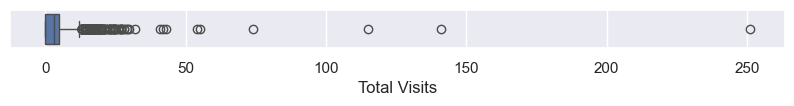

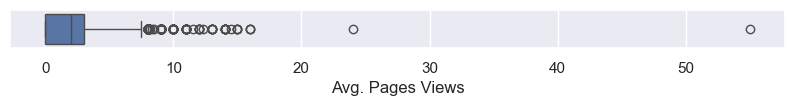

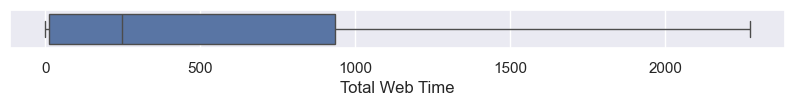

In [32]:
for i in numerics:
    plt.figure(figsize=[10,0.5])
    sns.boxplot(data[i], orient='h')
    plt.show()

### Handling the outliers

In [33]:
cut = data['Total Visits'].quantile(0.99)
print(str(cut)+ ' at 0.99 %ile for Total Visits' ) 
data = data[data['Total Visits']<= cut]

cut = data['Avg. Pages Views'].quantile(0.99)
print(str(cut)+ ' at 0.99 %ile for Avg. Pages Views' ) 
data = data[data['Avg. Pages Views']<= cut]


17.0 at 0.99 %ile for Total Visits
9.0 at 0.99 %ile for Avg. Pages Views


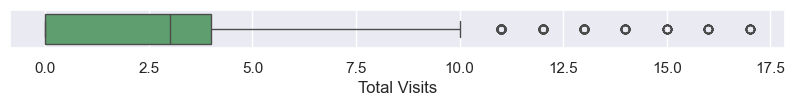

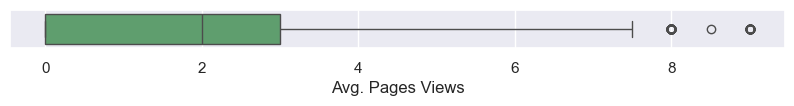

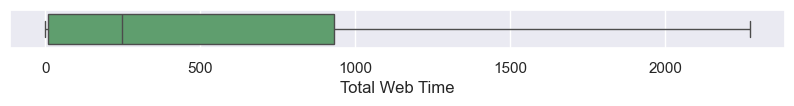

In [34]:
for i in numerics:
    plt.figure(figsize=[10,0.5])
    sns.boxplot(data[i], orient='h',color='g')
    plt.show()

### 2.2 Univariate analysis

In [35]:
categories = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'Current Occupation', 'Tags','Interview Mag. freebie']

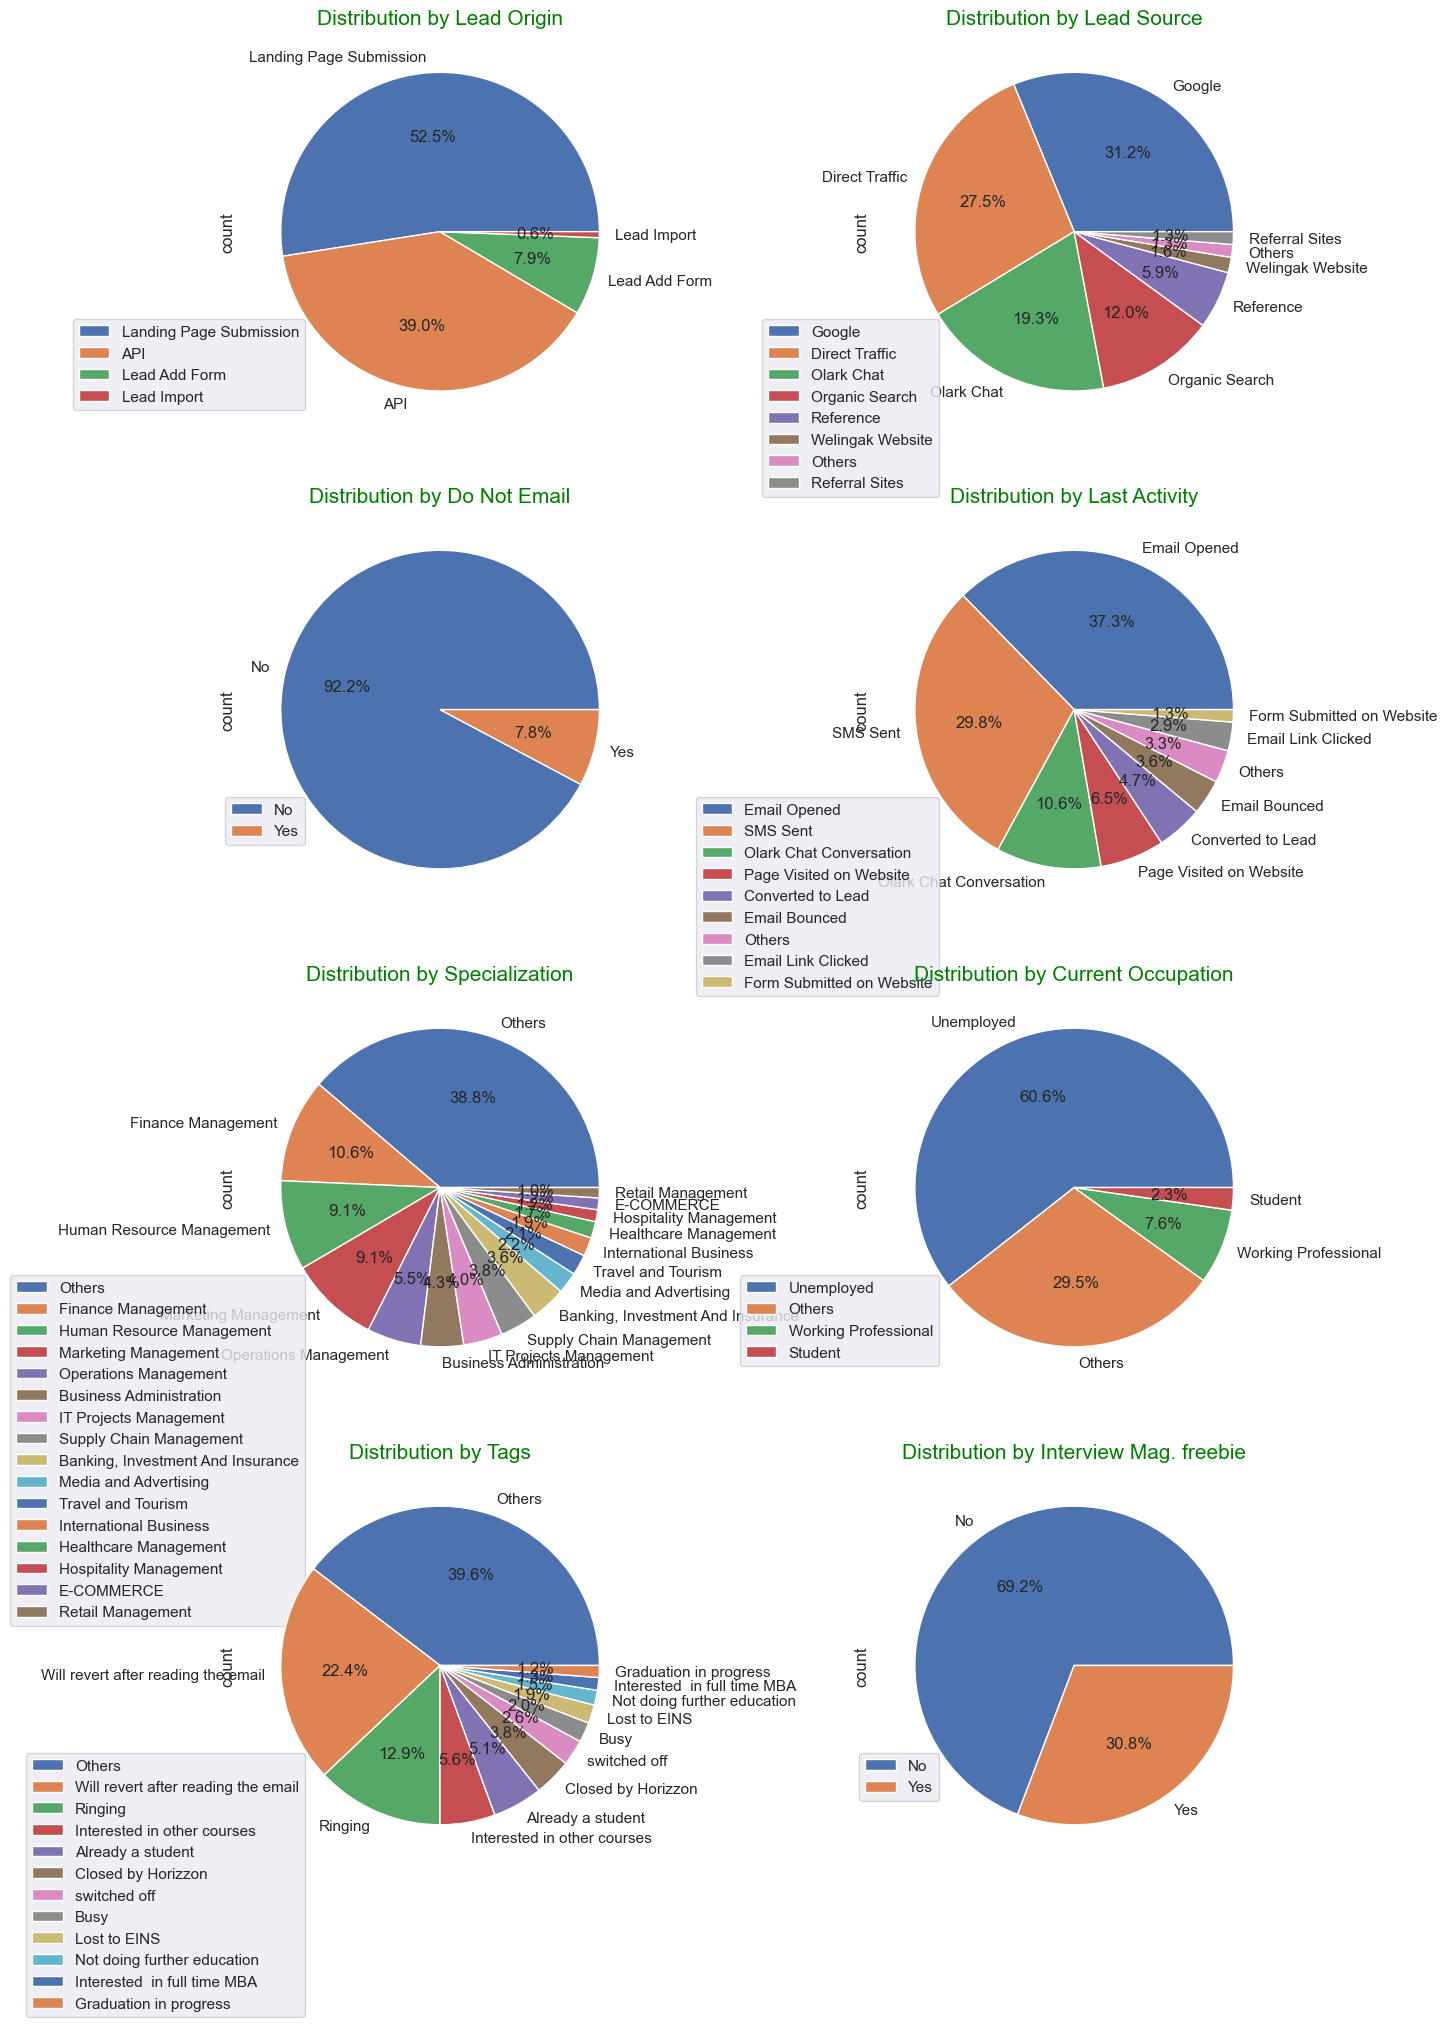

In [36]:
fig = plt.figure(figsize=[15,30])
j=1
for i in categories:
    plt.subplot(5,2,j)
    data[i].value_counts().plot.pie(autopct='%1.1f%%')
    
    title = "Distribution by "+i
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
    
    plt.legend()
    plt.legend(bbox_to_anchor=(0.18,0.3))

    j+=1
    
    
plt.show()

### 2.2 Univariate analysis wrt target

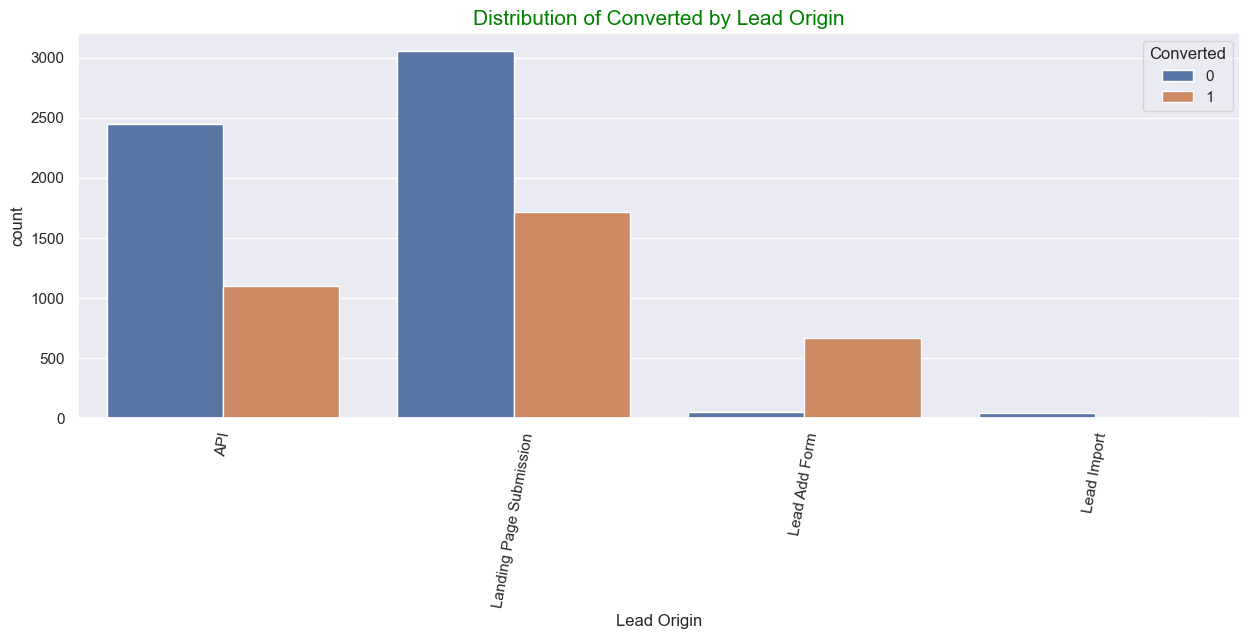

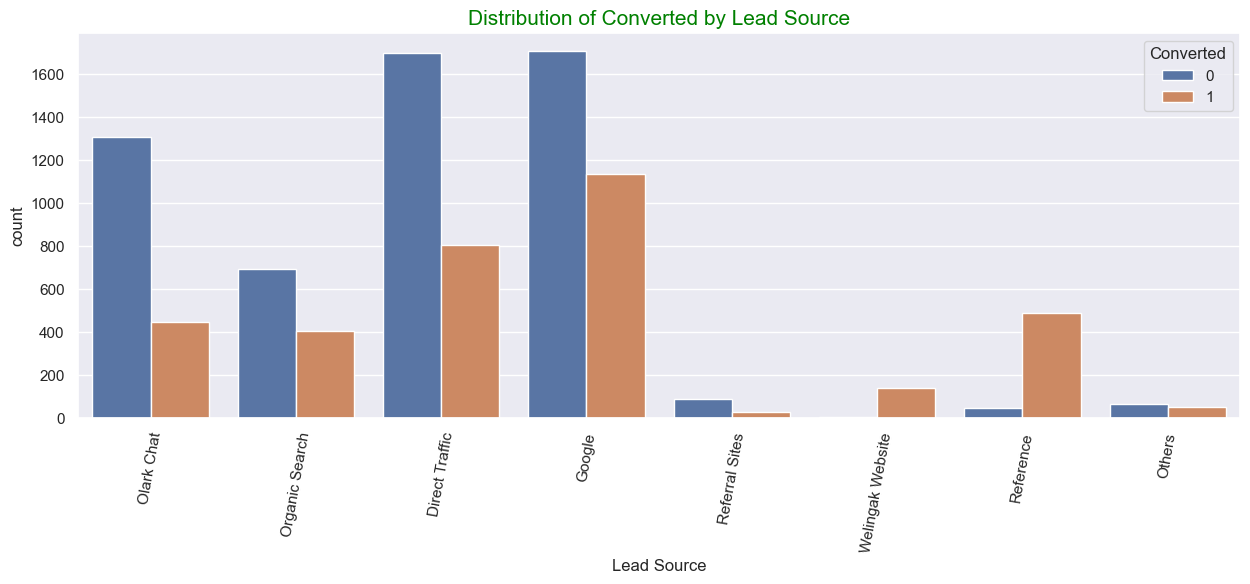

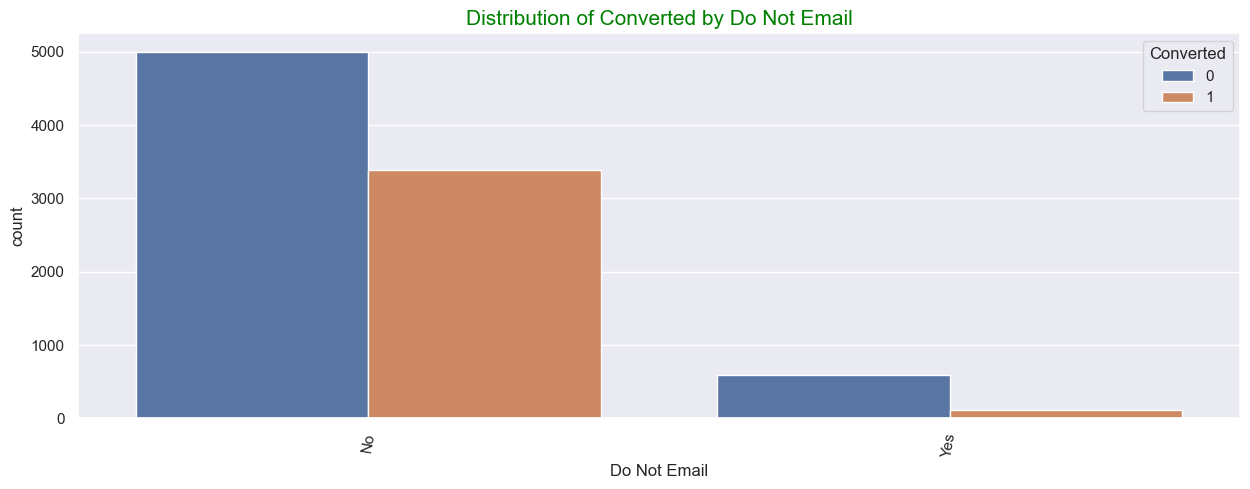

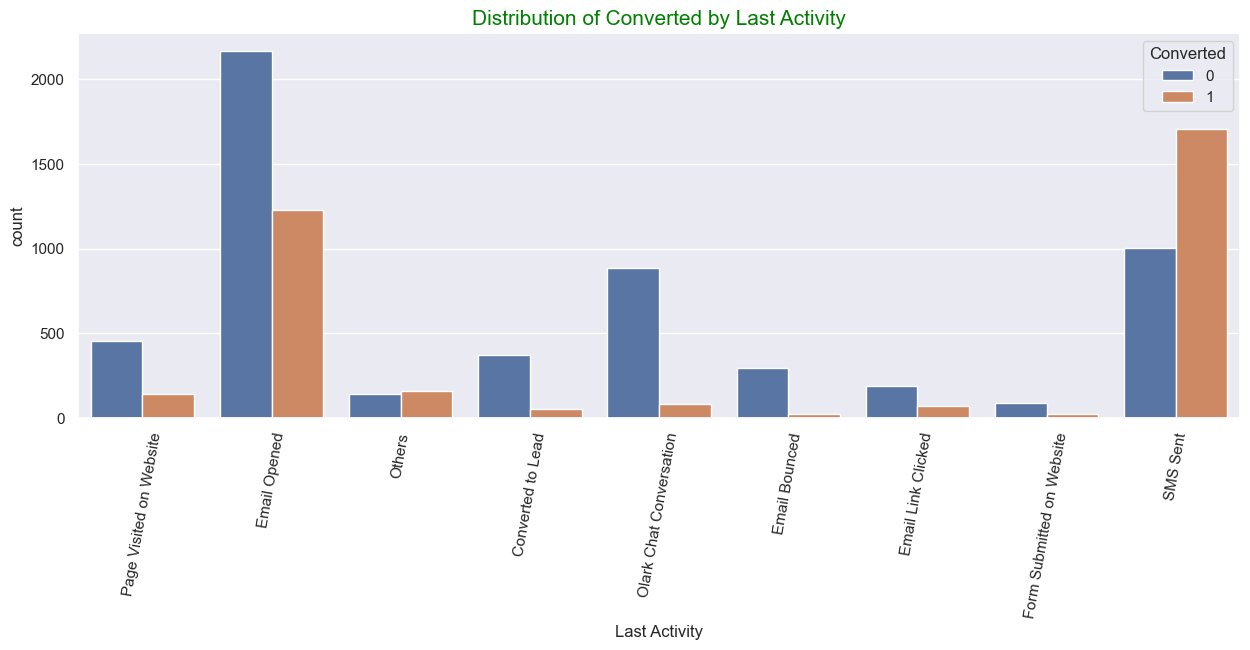

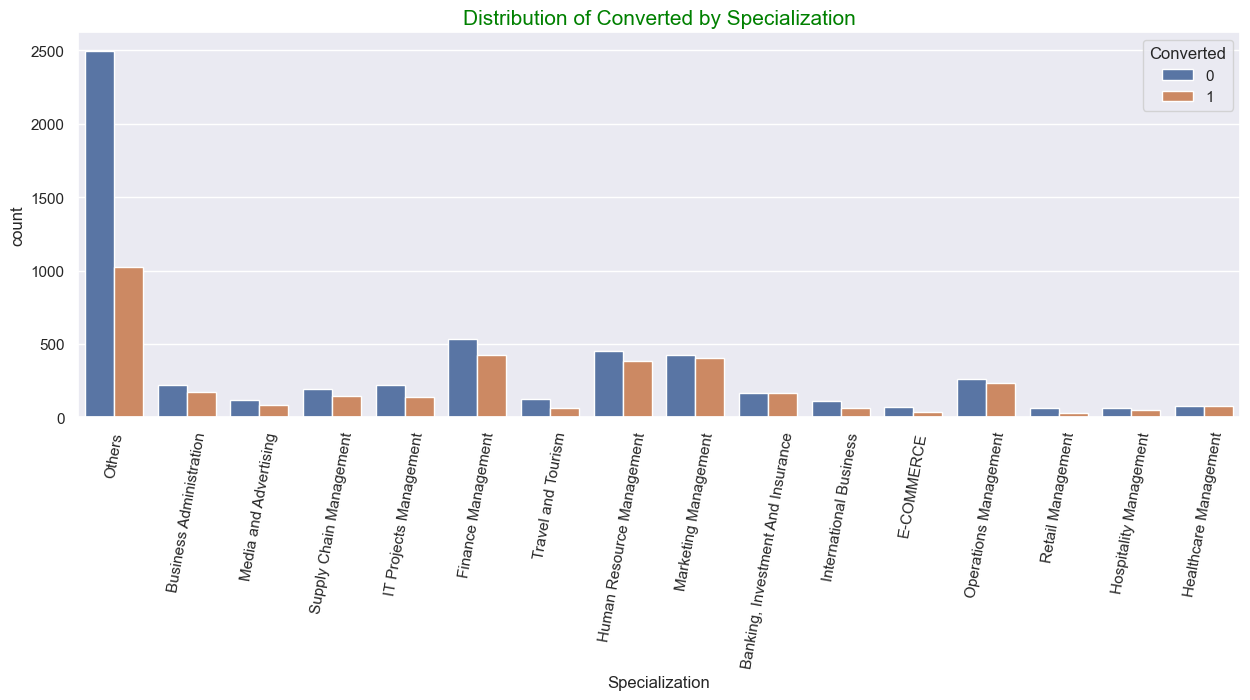

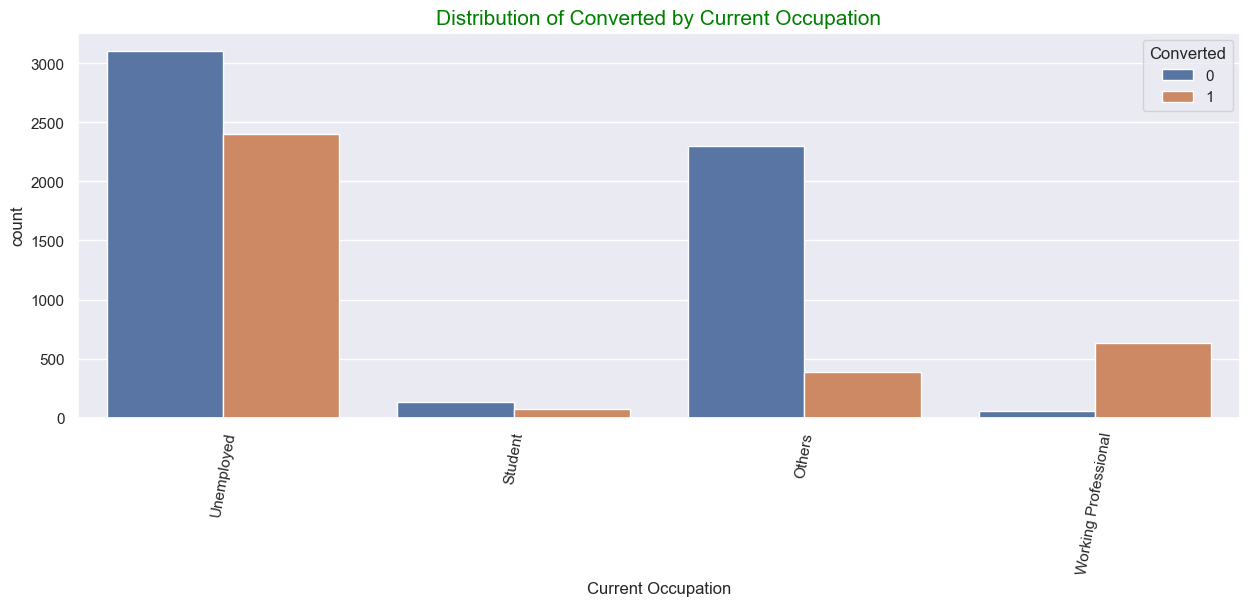

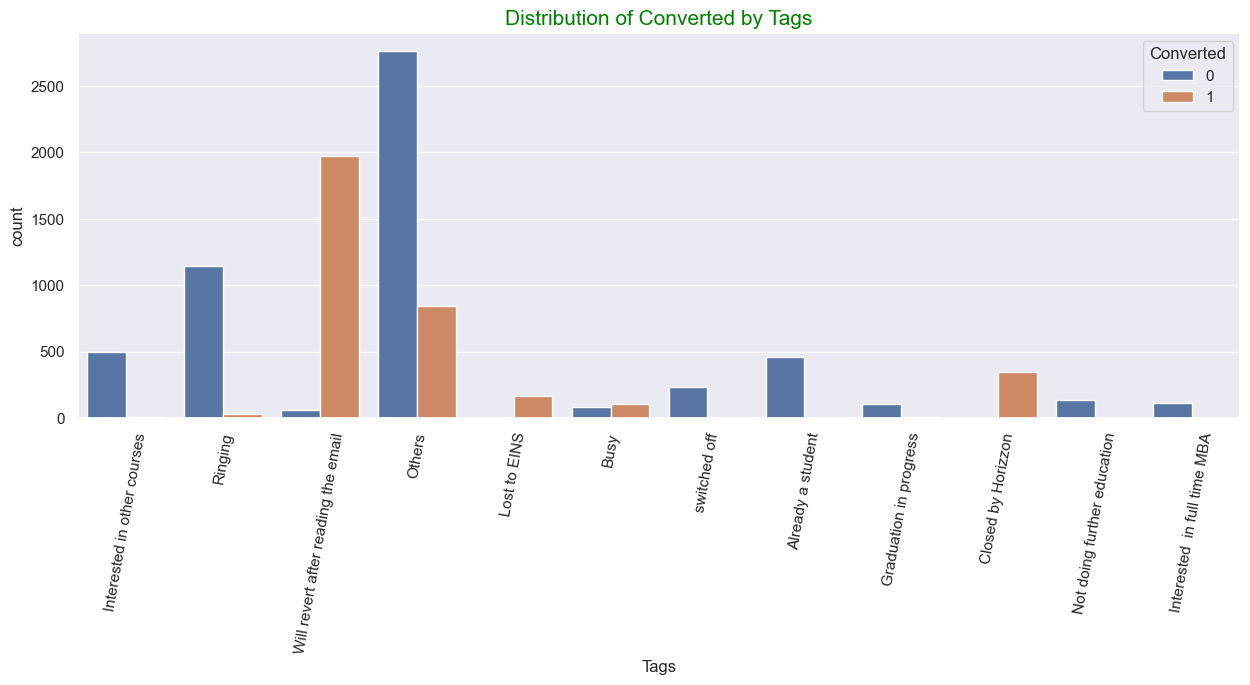

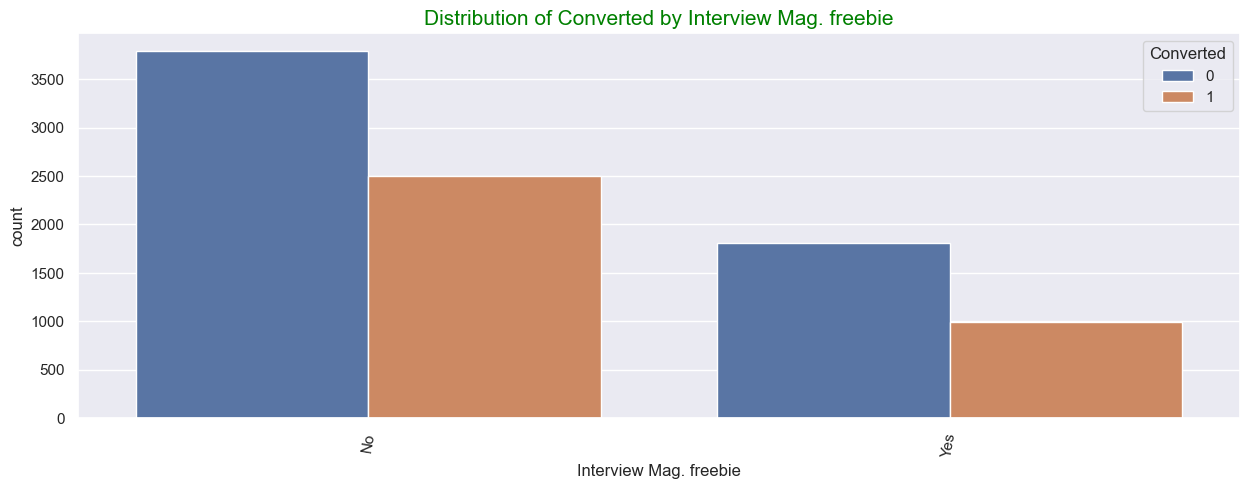

In [37]:
for i in categories:
    plt.figure(figsize=[15,5])
    sns.countplot(data=data, x=i, hue='Converted')

    title = "Distribution of Converted by "+i
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    plt.xticks(rotation=80)
    plt.show()
    


### 2.2 Bivariate analysis wrt target on numeric variables

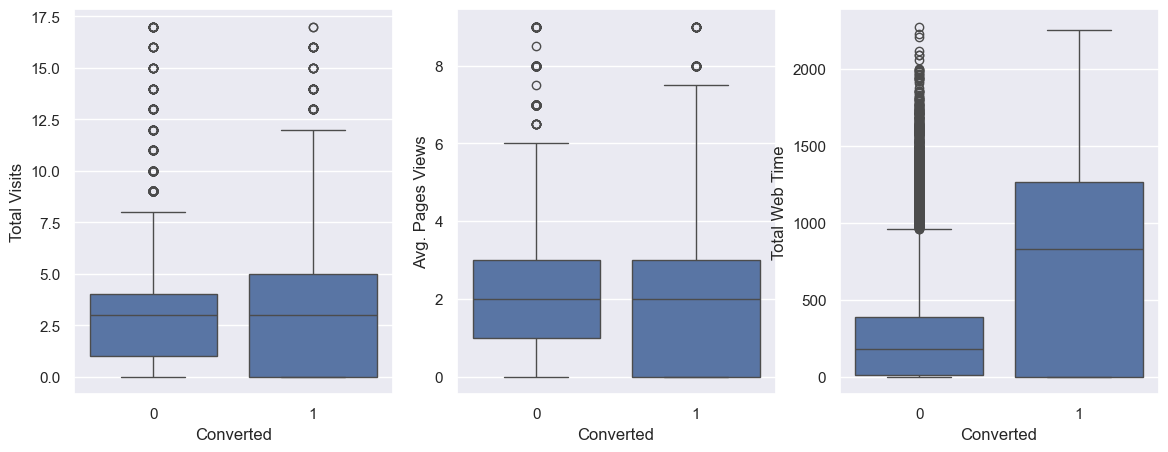

In [38]:
fig = plt.figure(figsize=[14,5])
j=1
for i in numerics:
    plt.subplot(1,3,j)
    
    sns.boxplot(data, x='Converted', y=i)
    j+=1
plt.show()

<Axes: >

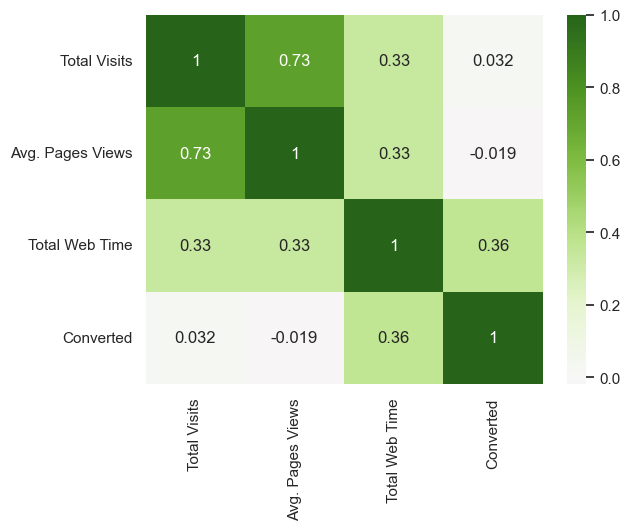

In [39]:
numerics_ = ['Total Visits', 'Avg. Pages Views','Total Web Time','Converted']
corr = data[numerics_].corr()
sns.heatmap(corr,annot = True, cmap="PiYG", center=0)

* !! high multicolinearity.

## 3. Data Prepration

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Lead Origin             9090 non-null   object 
 1   Lead Source             9090 non-null   object 
 2   Do Not Email            9090 non-null   object 
 3   Converted               9090 non-null   int64  
 4   Total Visits            9090 non-null   float64
 5   Total Web Time          9090 non-null   int64  
 6   Avg. Pages Views        9090 non-null   float64
 7   Last Activity           9090 non-null   object 
 8   Specialization          9090 non-null   object 
 9   Current Occupation      9090 non-null   object 
 10  Tags                    9090 non-null   object 
 11  Interview Mag. freebie  9090 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 923.2+ KB


In [41]:
data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   Total Visits  Total Web Time  Avg. Pages Views            Last Activity  \
0           0.0               0               0.0  Page Visited on Website   
1           5.0             674               2.5             Email Opened   
2           2.0            1532               2.0             Email Opened   
3           1.0             305               1.0                   Others   
4           2.0            1428               1.0        Converted to Lead   

            Specialization Current Occupation  \
0                   Others         Unemployed   
1                   Others         Unemployed   
2  Business Administration            Student   
3    Media and Advertising         Unemployed   
4                   Others         Unemployed   

                                  Tags Interview Mag. freebie  
0          Interested in other courses                     No  
1                              Ringing                     No  
2  Will revert after reading the email                    Yes  
3                              Ringing                     No  
4  Will revert after reading the email                     No

### 3.1 Converting Binary Variables (Yes/No)

In [42]:
Binary = ['Do Not Email','Interview Mag. freebie']
def bin_map(x):
    return x.map({'Yes':1,'No':0})
data[Binary] = data[Binary].apply(bin_map)

### 3.2 Creating Dummy Variables

In [43]:
catlist = ['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'Current Occupation', 'Tags',]
dummy = pd.get_dummies(data[catlist],dtype=int,drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_E-COMMERCE  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                      

In [44]:
data = pd.concat([data,dummy], axis=1)

In [45]:
data.drop(catlist,axis=1, inplace=True)

In [46]:
data.head()

Do Not Email  Converted  Total Visits  Total Web Time  Avg. Pages Views  \
0             0          0           0.0               0               0.0   
1             0          0           5.0             674               2.5   
2             0          1           2.0            1532               2.0   
3             0          0           1.0             305               1.0   
4             0          1           2.0            1428               1.0   

   Interview Mag. freebie  Lead Origin_Landing Page Submission  \
0                       0                                    0   
1                       0                                    0   
2                       1                                    1   
3                       0                                    1   
4                       0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   0   
4                          0                        0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   

In [47]:
data.shape

(9090, 53)

## Importing all Stats Libs

In [48]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

## 4. Test-Train Split

In [49]:
X = data.drop('Converted',axis=1)
y = data.Converted

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6363, 52), (2727, 52), (6363,), (2727,))

## 5. Feature Scalling

In [51]:
scaler = StandardScaler()
X_train[numerics] = scaler.fit_transform(X_train[numerics])
X_train.head()

Do Not Email  Total Visits  Total Web Time  Avg. Pages Views  \
302              0      1.340545       -0.428736          0.059262   
6087             1     -1.070195       -0.887355         -1.178546   
1033             0      0.651762       -0.025151          1.477695   
7656             1      0.996153       -0.241619          2.008943   
3241             0      0.307371        0.897591         -0.471986   

      Interview Mag. freebie  Lead Origin_Landing Page Submission  \
302                        0                                    0   
6087                       0                                    0   
1033                       0                                    0   
7656                       1                                    1   
3241                       1                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
302                           0                        0                   0   
6087                          0                        0                   0   
1033                          0                        0                   1   
7656                          0                        0                   0   
3241                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
302                        0                           0                   0   
6087                       1                           0                   0   
1033                       0                           0                   0   
7656                       0                           0                   0   
3241                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
302                       0                           1   
6087                      0                           0   
1033                      0                           0   
7656                      0                           0   
3241                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
302                              0                            0   
6087                             0                            1   
1033                             0                            0   
7656                             0                            0   
3241                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
302                                  0                           1   
6087                                 0                           0   
1033                                 0                           1   
7656                                 0                           0   
3241                                 0                           0   

      Last Activity_Form Submitted on Website  \
302                                         0   
6087                                        0   
1033                                        0   
7656                                        0   
3241                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
302                                       0                     0   
6087                                      0                     0   
1033                                      0                     0   
7656                                      0                     0   
3241                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
302                                       0                       0   
6087                                      0                       0   
1033                                      0                       0   
7656                               

### Heatmap

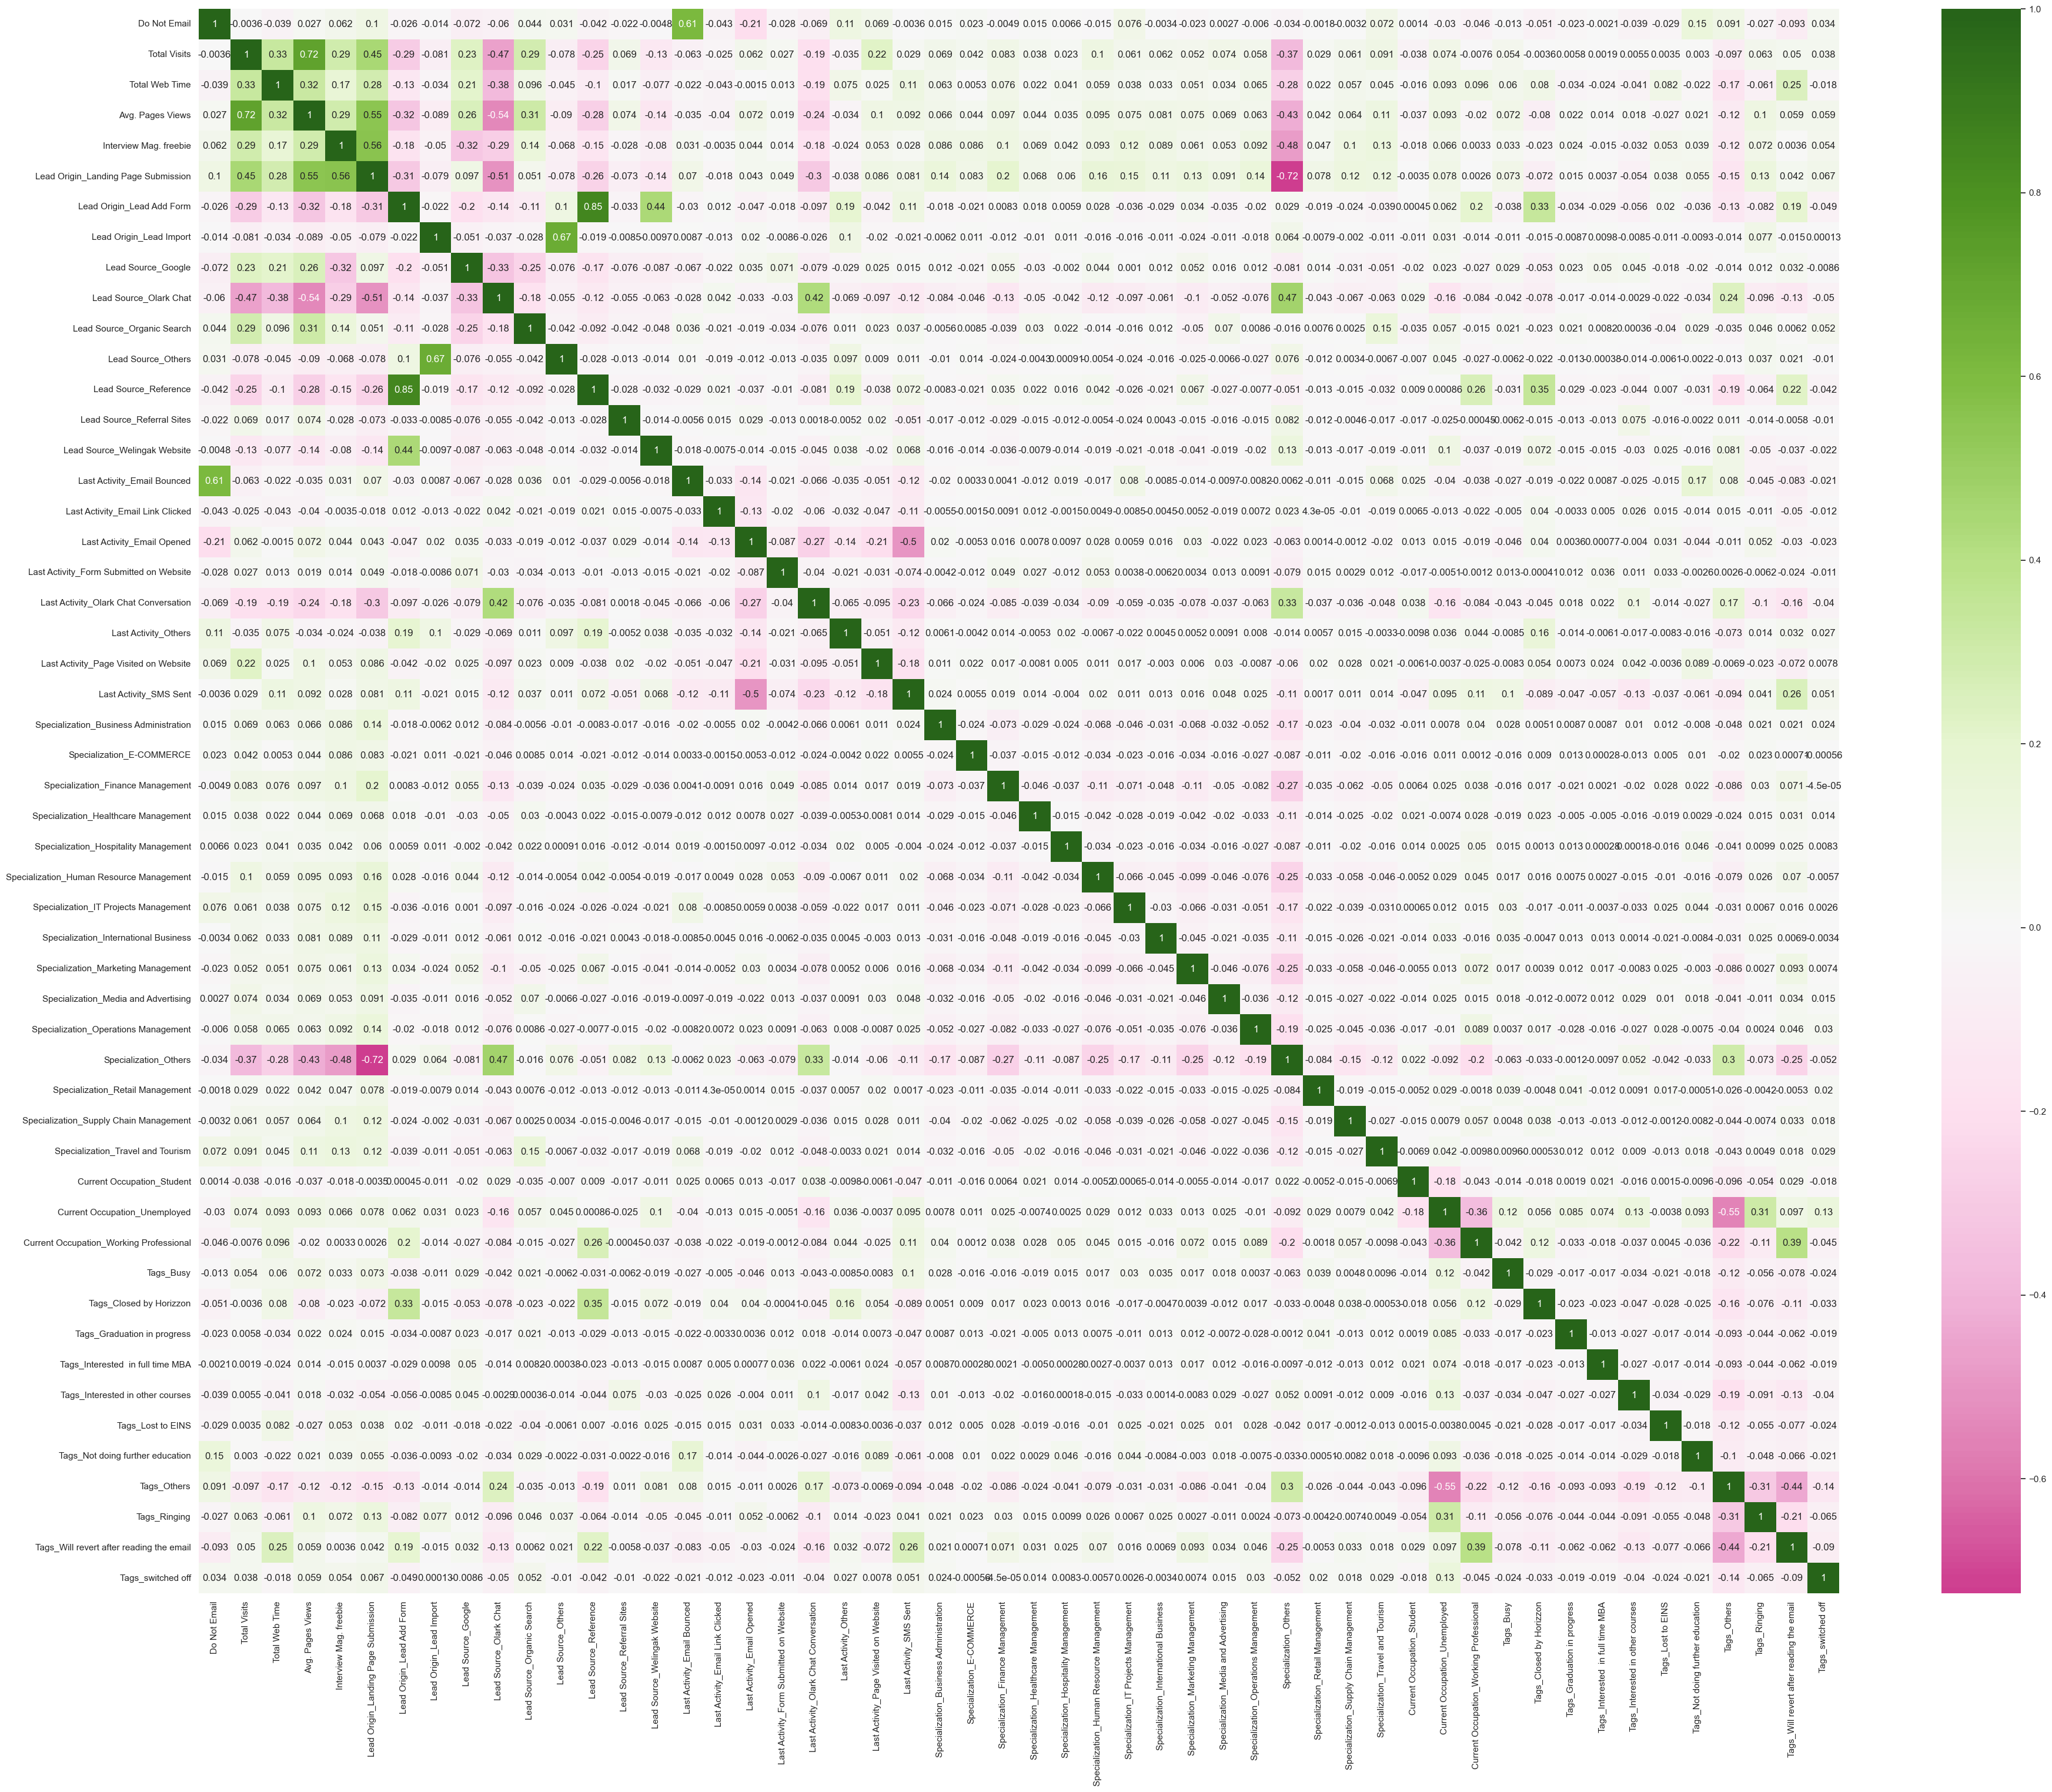

In [52]:
plt.figure(figsize = (45,35))
sns.heatmap(X_train.corr(),cmap="PiYG", center=0,annot = True)
plt.show()

## 6. Model Building -Logistic Regression

In [53]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe =  rfe.fit(X_train,y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', np.True_, np.int64(1)),
 ('Total Visits', np.False_, np.int64(21)),
 ('Total Web Time', np.False_, np.int64(5)),
 ('Avg. Pages Views', np.False_, np.int64(22)),
 ('Interview Mag. freebie', np.False_, np.int64(19)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(14)),
 ('Lead Origin_Lead Add Form', np.False_, np.int64(2)),
 ('Lead Origin_Lead Import', np.False_, np.int64(15)),
 ('Lead Source_Google', np.False_, np.int64(28)),
 ('Lead Source_Olark Chat', np.False_, np.int64(4)),
 ('Lead Source_Organic Search', np.False_, np.int64(32)),
 ('Lead Source_Others', np.False_, np.int64(26)),
 ('Lead Source_Reference', np.False_, np.int64(11)),
 ('Lead Source_Referral Sites', np.False_, np.int64(27)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Email Bounced', np.False_, np.int64(3)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(24)),
 ('Last Activity_Email Opened', np.False_, np.int64(12)),
 ('Last Activity_Form Submitt

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

In [56]:
def vif(model):
    vif = pd.DataFrame()
    vif['Features'] = model.columns
    vif['VIF'] = [variance_inflation_factor(model.values, i) for i in range(model.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif
    

In [57]:
X_train_sm = sm.add_constant(X_train[col])
col_rfe = X_train[col]
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

print(logreg.summary())
vif(col_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.4
Date:                Tue, 30 Jul 2024   Deviance:                       2840.8
Time:                        22:03:44   Pearson chi2:                 7.11e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5865
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
4              Current Occupation_Unemployed  3.87
13  Tags_Will revert after reading the email  2.71
12                              Tags_Ringing  1.86
5    Current Occupation_Working Professional  1.72
3                     Last Activity_SMS Sent  1.69
11                               Tags_Others  1.52
8           Tags_Interested in other courses  1.30
7                    Tags_Closed by Horizzon  1.25
2      Last Activity_Olark Chat Conversation  1.21
14                         Tags_switched off  1.19
6                                  Tags_Busy  1.16
0                               Do Not Email  1.13
10          Tags_Not doing further education  1.12
1               Lead Source_Welingak Website  1.07
9                          Tags_Lost to EINS  1.06

### Model 2. 

In [58]:
# Dropping 'Tags_Not doing further education' for its high P-value
col = col.drop('Tags_Not doing further education')

In [59]:
X_train_sm = sm.add_constant(X_train[col])
col_rfe = X_train[col]
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

print(logreg.summary())
vif(col_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.7
Date:                Tue, 30 Jul 2024   Deviance:                       2845.4
Time:                        22:03:44   Pearson chi2:                 7.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5862
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
4              Current Occupation_Unemployed  3.59
12  Tags_Will revert after reading the email  2.61
11                              Tags_Ringing  1.80
3                     Last Activity_SMS Sent  1.69
5    Current Occupation_Working Professional  1.69
10                               Tags_Others  1.50
8           Tags_Interested in other courses  1.28
7                    Tags_Closed by Horizzon  1.23
2      Last Activity_Olark Chat Conversation  1.21
13                         Tags_switched off  1.18
6                                  Tags_Busy  1.15
0                               Do Not Email  1.10
1               Lead Source_Welingak Website  1.07
9                          Tags_Lost to EINS  1.06

### Model 3. 

In [60]:
# Dropping 'Tags_Interested in other courses' for its high P-value
col = col.drop('Tags_Interested in other courses')

In [61]:
X_train_sm = sm.add_constant(X_train[col])
col_rfe = X_train[col]
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

print(logreg.summary())
vif(col_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.7
Date:                Tue, 30 Jul 2024   Deviance:                       2845.5
Time:                        22:03:44   Pearson chi2:                 7.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5862
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
4              Current Occupation_Unemployed  2.91
11  Tags_Will revert after reading the email  2.38
3                     Last Activity_SMS Sent  1.69
10                              Tags_Ringing  1.65
5    Current Occupation_Working Professional  1.60
9                                Tags_Others  1.45
7                    Tags_Closed by Horizzon  1.19
2      Last Activity_Olark Chat Conversation  1.18
12                         Tags_switched off  1.15
6                                  Tags_Busy  1.12
0                               Do Not Email  1.10
1               Lead Source_Welingak Website  1.07
8                          Tags_Lost to EINS  1.05

### Model 4. 

In [62]:
# Dropping 'Tags_Ringing' for its high P-value
col = col.drop('Tags_Ringing')

In [63]:
X_train_sm = sm.add_constant(X_train[col])
col_rfe = X_train[col]
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

print(logreg.summary())
vif(col_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.3
Date:                Tue, 30 Jul 2024   Deviance:                       2848.7
Time:                        22:03:44   Pearson chi2:                 7.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5860
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
10  Tags_Will revert after reading the email  1.96
4              Current Occupation_Unemployed  1.94
3                     Last Activity_SMS Sent  1.65
5    Current Occupation_Working Professional  1.51
9                                Tags_Others  1.38
2      Last Activity_Olark Chat Conversation  1.18
7                    Tags_Closed by Horizzon  1.14
0                               Do Not Email  1.10
11                         Tags_switched off  1.09
6                                  Tags_Busy  1.08
1               Lead Source_Welingak Website  1.06
8                          Tags_Lost to EINS  1.03

### Model 5. 

In [64]:
# Dropping 'Tags_switched off' for its high P-value
col = col.drop('Tags_switched off')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
col_rfe = X_train[col]
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

print(logreg.summary())
vif(col_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.6
Date:                Tue, 30 Jul 2024   Deviance:                       2853.3
Time:                        22:03:45   Pearson chi2:                 7.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5857
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Features   VIF
10  Tags_Will revert after reading the email  1.91
4              Current Occupation_Unemployed  1.84
3                     Last Activity_SMS Sent  1.63
5    Current Occupation_Working Professional  1.50
9                                Tags_Others  1.37
2      Last Activity_Olark Chat Conversation  1.18
7                    Tags_Closed by Horizzon  1.13
0                               Do Not Email  1.10
6                                  Tags_Busy  1.07
1               Lead Source_Welingak Website  1.06
8                          Tags_Lost to EINS  1.03

## 7. Model Evaluation/Prediction

In [66]:
y_train_pred = logreg.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.08743176, 0.02257824, 0.34749491, ..., 0.14894631, 0.34749491,
       0.0136859 ])

In [67]:
# data frame for actual converted
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


Converted  Converted_Prob  Prospect ID
0          0        0.087432          302
1          0        0.022578         6087
2          0        0.347495         1033
3          0        0.020626         7656
4          1        0.991536         3241

In [68]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.087432          302          0
1          0        0.022578         6087          0
2          0        0.347495         1033          0
3          0        0.020626         7656          0
4          1        0.991536         3241          1

## Confusion Matrix

In [69]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3789,  146],
       [ 426, 2002]])

In [70]:
# Checking  overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.9101052962439101


## 0.910 accuracy on Train set

### metrices beyond Accuracy

In [71]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]
print("Senstivity : ", TP/(TP+FN))
print("Specificity : ",TN /(TN+FP))
print("False Positive Rate : ", FP / (TN+FP))
print("Positive Predictive rate : ", TP /(TP+FP))
print("Negative Predictive rate : ", TN /(TN+ FN))

Senstivity :  0.8245469522240527
Specificity :  0.9628970775095299
False Positive Rate :  0.03710292249047014
Positive Predictive rate :  0.9320297951582868
Negative Predictive rate :  0.898932384341637


## Test model Evaluation...

In [72]:
X_test[numerics] = scaler.transform(X_test[numerics])
X_test= X_test[col]

In [73]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2727, 12)

In [74]:
y_test_pred = logreg.predict(X_test_sm)
y_test_pred

6906    0.991536
1873    0.080332
771     0.013686
4495    0.013686
9061    0.970751
          ...   
1939    0.304904
1540    0.949007
5198    0.087432
8660    0.030525
6219    0.770244
Length: 2727, dtype: float64

In [75]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob': y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

Converted  Converted_Prob  Prospect ID
6906          1        0.991536         6906
1873          0        0.080332         1873
771           0        0.013686          771
4495          0        0.013686         4495
9061          1        0.970751         9061

In [76]:
y_test_pred_final['Predicted'] = y_test_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
6906          1        0.991536         6906          1
1873          0        0.080332         1873          0
771           0        0.013686          771          0
4495          0        0.013686         4495          0
9061          1        0.970751         9061          1

In [77]:
confusion = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[1607,   53],
       [ 189,  878]])

In [78]:
print(metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["Predicted"]))

0.9112577924459112


## 0.911 accuracy on Test set

In [79]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]
print("Senstivity : ", TP/(TP+FN))
print("Specificity : ",TN /(TN+FP))
print("False Positive Rate : ", FP / (TN+FP))
print("Positive Predictive rate : ", TP /(TP+FP))
print("Negative Predictive rate : ", TN /(TN+ FN))

Senstivity :  0.8228678537956888
Specificity :  0.9680722891566265
False Positive Rate :  0.031927710843373494
Positive Predictive rate :  0.9430719656283566
Negative Predictive rate :  0.8947661469933185



## 8. ROC Curve


In [80]:
from sklearn.metrics import roc_curve, auc

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

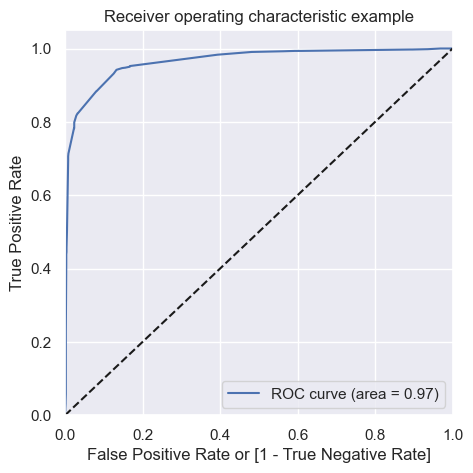

In [82]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob,drop_intermediate = False)
draw_roc(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"])

## 9.  Optimal Cutoff point

In [83]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.087432          302          0    1    0    0    0    0   
1          0        0.022578         6087          0    1    0    0    0    0   
2          0        0.347495         1033          0    1    1    1    1    0   
3          0        0.020626         7656          0    1    0    0    0    0   
4          1        0.991536         3241          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    1    1

In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.877573  0.953048  0.831004
0.2   0.2  0.890932  0.943575  0.858450
0.3   0.3  0.890932  0.943575  0.858450
0.4   0.4  0.910105  0.824547  0.962897
0.5   0.5  0.910420  0.820016  0.966201
0.6   0.6  0.910262  0.819605  0.966201
0.7   0.7  0.910262  0.819605  0.966201
0.8   0.8  0.888575  0.731054  0.985769
0.9   0.9  0.884174  0.716639  0.987548


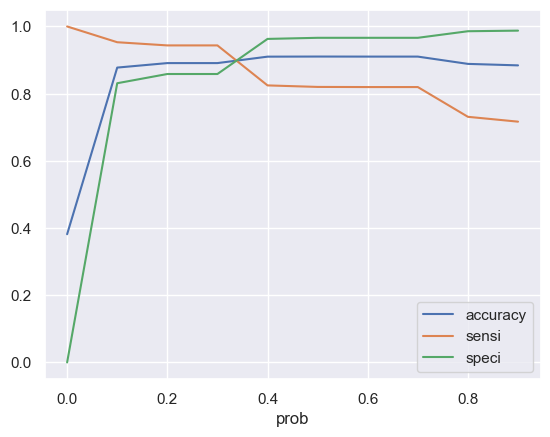

In [85]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Model Using 0.33 as cutoff

In [86]:
y_test_pred_final['Predicted'] = y_test_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.33 else 0)
y_test_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
6906          1        0.991536         6906          1
1873          0        0.080332         1873          0
771           0        0.013686          771          0
4495          0        0.013686         4495          0
9061          1        0.970751         9061          1

In [87]:
confusion = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[1452,  208],
       [  73,  994]])

In [88]:
print(metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["Predicted"]))

0.896956362302897


## 0.897 accuracy with cutoff 

In [89]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]
print("Senstivity : ", TP/(TP+FN))
print("Specificity : ",TN /(TN+FP))
print("False Positive Rate : ", FP / (TN+FP))
print("Positive Predictive rate : ", TP /(TP+FP))
print("Negative Predictive rate : ", TN /(TN+ FN))

Senstivity :  0.9315838800374883
Specificity :  0.8746987951807229
False Positive Rate :  0.12530120481927712
Positive Predictive rate :  0.826955074875208
Negative Predictive rate :  0.9521311475409836


In [90]:
## Precision -recall tradeoff

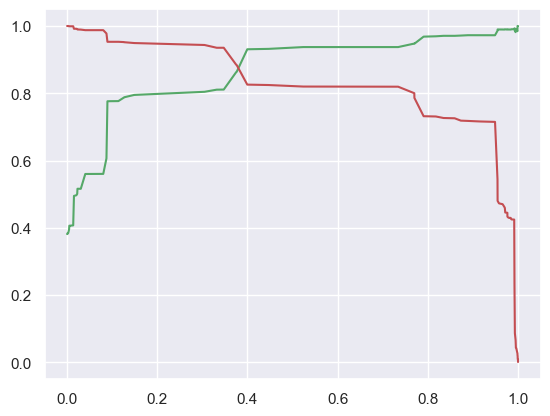

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction using precisio/recall Trade off

In [92]:
y_test_pred_final['Predicted'] = y_test_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
6906          1        0.991536         6906          1
1873          0        0.080332         1873          0
771           0        0.013686          771          0
4495          0        0.013686         4495          0
9061          1        0.970751         9061          1

In [93]:
y_test_pred_final.shape

(2727, 4)

In [94]:
confusion = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[1606,   54],
       [ 189,  878]])

In [95]:
print("Accuracy : ",metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["Predicted"]))
print("")
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]
print("Senstivity : ", TP/(TP+FN))
print("Specificity : ",TN /(TN+FP))
print("False Positive Rate : ", FP / (TN+FP))
print("Positive Predictive rate : ", TP /(TP+FP))
print("Negative Predictive rate : ", TN /(TN+ FN))

Accuracy :  0.9108910891089109

Senstivity :  0.8228678537956888
Specificity :  0.9674698795180723
False Positive Rate :  0.03253012048192771
Positive Predictive rate :  0.9420600858369099
Negative Predictive rate :  0.8947075208913648


## 0.911 accuracy with cutoff

## 10. Giving the lead score to the final data

In [96]:
y_test_pred_final['Lead Score'] = round(y_test_pred_final['Converted_Prob']*100,0)

In [97]:
y_test_pred_final.shape

(2727, 5)

In [98]:
y_test_pred_final

Converted  Converted_Prob  Prospect ID  Predicted  Lead Score
6906          1        0.991536         6906          1        99.0
1873          0        0.080332         1873          0         8.0
771           0        0.013686          771          0         1.0
4495          0        0.013686         4495          0         1.0
9061          1        0.970751         9061          1        97.0
...         ...             ...          ...        ...         ...
1939          0        0.304904         1939          0        30.0
1540          1        0.949007         1540          1        95.0
5198          1        0.087432         5198          0         9.0
8660          0        0.030525         8660          0         3.0
6219          0        0.770244         6219          1        77.0

[2727 rows x 5 columns]

# thanks